[View in Colaboratory](https://colab.research.google.com/github/KUNAL1612/GooglePlayStoreApps/blob/master/GooglePlayApp.ipynb)

In [0]:
!pip install -q bokeh

In [22]:
!pip install seaborn==0.9.0

    100% |████████████████████████████████| 215kB 6.6MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [29]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving googleplaystore.csv to googleplaystore (1).csv
Saving googleplaystore_user_reviews.csv to googleplaystore_user_reviews (1).csv
User uploaded file "googleplaystore.csv" with length 1360155 bytes
User uploaded file "googleplaystore_user_reviews.csv" with length 7669276 bytes


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



sns.set(style='white',palette='deep',context='notebook')

In [4]:
data=pd.read_csv('googleplaystore.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
data.shape

(10841, 13)

In [6]:
missing=data.isnull().sum().sort_values(ascending=False)
percentage=((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)
table=pd.concat([missing,percentage],axis=1,keys=['Total','Percent'])
table


,Total,Percent
Rating,1474,13.596532
Current Ver,8,0.073794
Android Ver,3,0.027673
Content Rating,1,0.009224
Type,1,0.009224
Last Updated,0,0.000000
Genres,0,0.000000
Price,0,0.000000
Installs,0,0.000000
Size,0,0.000000


In [0]:
#dropping all null values
data.dropna(axis=0,how='any',inplace=True)

In [8]:
data.shape

(9360, 13)

In [9]:
data['Rating'].describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Text(0.5,1,'Rating distribution')

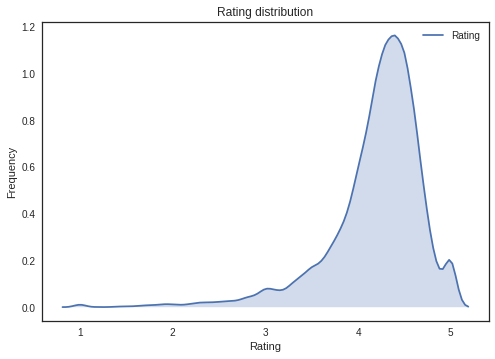

In [10]:
graph=sns.kdeplot(data['Rating'],shade='True')
graph.set(xlabel='Rating',ylabel='Frequency')
plt.title('Rating distribution')

In [11]:

print("There are "+str(len(data['Category'].unique()))+" unique categories of apps")
print(data['Category'].value_counts())

There are 33 unique categories of apps
FAMILY                 1746
GAME                   1097
TOOLS                   733
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             317
LIFESTYLE               314
PERSONALIZATION         312
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64


In [12]:
categories=((data['Category'].value_counts())*100/9360).sort_values(ascending=True)
categories

BEAUTY                  0.448718
EVENTS                  0.480769
PARENTING               0.534188
COMICS                  0.619658
ART_AND_DESIGN          0.651709
LIBRARIES_AND_DEMO      0.683761
AUTO_AND_VEHICLES       0.779915
WEATHER                 0.801282
HOUSE_AND_HOME          0.811966
FOOD_AND_DRINK          1.164530
MAPS_AND_NAVIGATION     1.324786
ENTERTAINMENT           1.591880
EDUCATION               1.655983
VIDEO_PLAYERS           1.709402
BOOKS_AND_REFERENCE     1.901709
DATING                  2.083333
TRAVEL_AND_LOCAL        2.414530
NEWS_AND_MAGAZINES      2.489316
SHOPPING                2.542735
SOCIAL                  2.767094
HEALTH_AND_FITNESS      3.173077
BUSINESS                3.237179
PERSONALIZATION         3.333333
LIFESTYLE               3.354701
PHOTOGRAPHY             3.386752
SPORTS                  3.408120
FINANCE                 3.450855
COMMUNICATION           3.504274
MEDICAL                 3.739316
PRODUCTIVITY            3.750000
TOOLS     

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Count of the different categories')

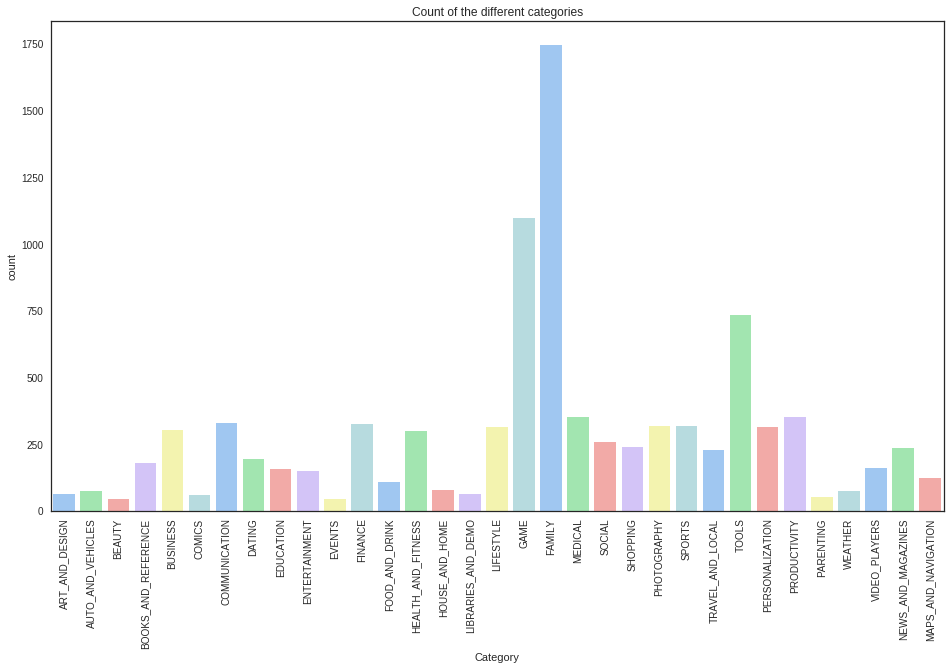

In [13]:
plt.figure(figsize=(16,9))
g=sns.countplot(x='Category',data=data,palette='pastel')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.title('Count of the different categories')

Text(0.5,1,'Categorical spread of ratings')

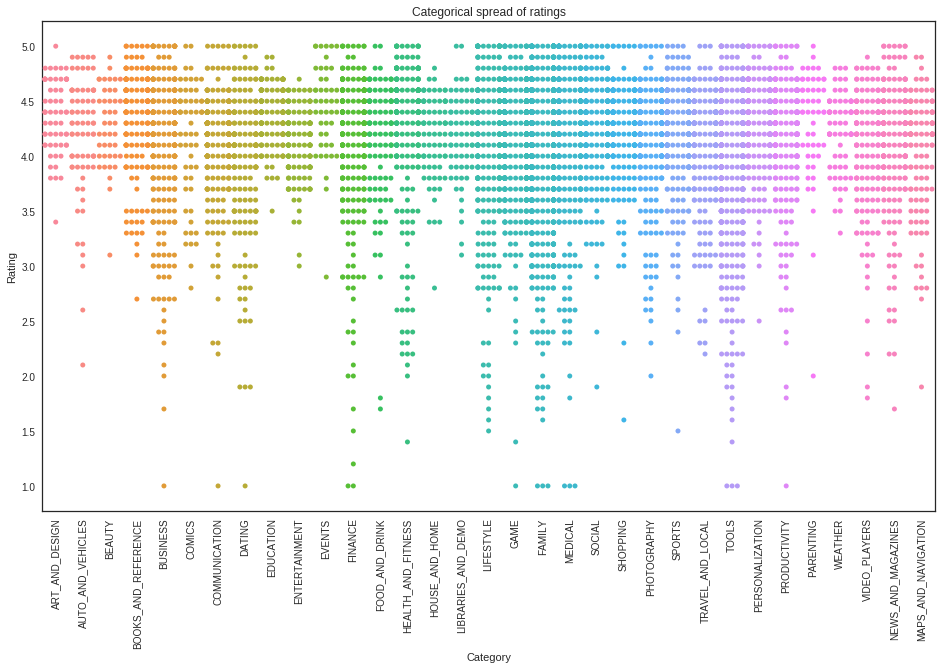

In [14]:
plt.figure(figsize=(16,9))
g=sns.swarmplot(x='Category',y='Rating',data=data)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.title('Categorical spread of ratings')

In [15]:
data["Reviews"].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

In [16]:
data["Reviews"].describe()

count     9360
unique    5990
top          2
freq        83
Name: Reviews, dtype: object

In [0]:
#It is still in object type so we need to convert it to int
data["Reviews"]=data["Reviews"].astype(int)

Text(0.5,1,'Distribution of Reviews')

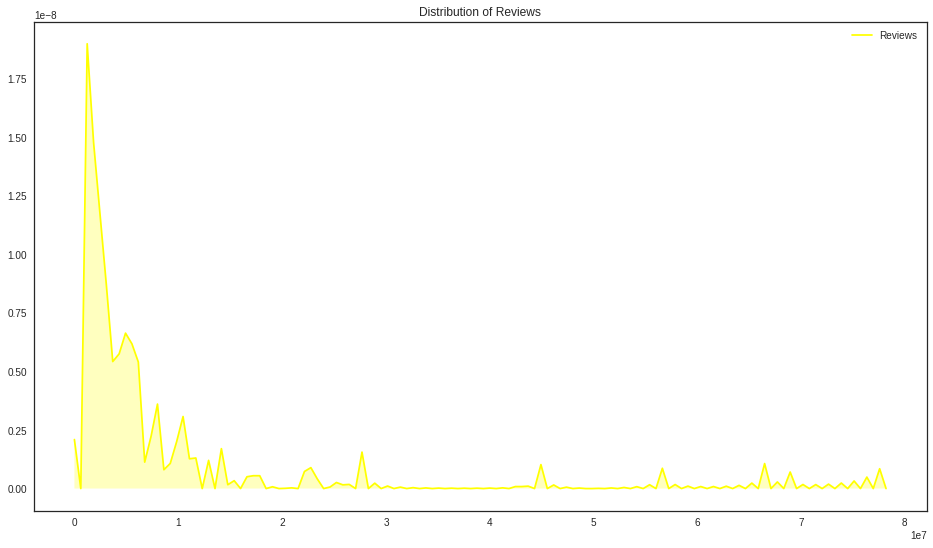

In [20]:
plt.figure(figsize=(16,9))
graph=sns.kdeplot(data["Reviews"],shade=True,color="Yellow")
g.set_xlabel("Number of reviews")
g.set_ylabel("Frequency")
plt.title("Distribution of Reviews")

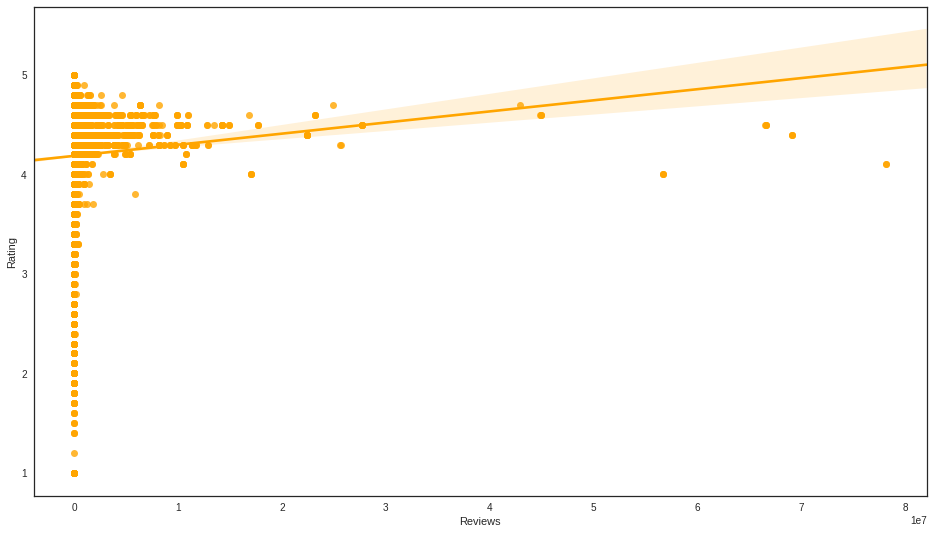

In [30]:
#Relationship between ratings and reviews
plt.figure(figsize=(16,9))
sns.regplot(x="Reviews",y="Rating",data=data,color="Orange")
